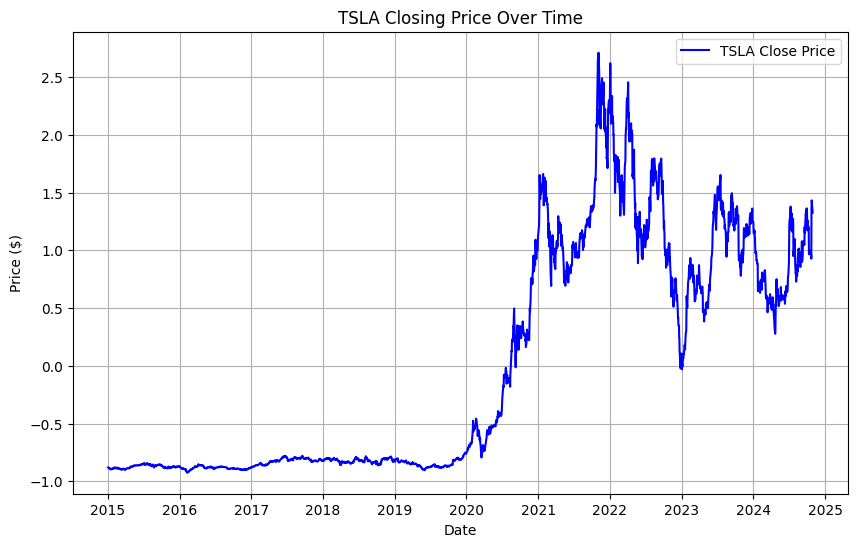

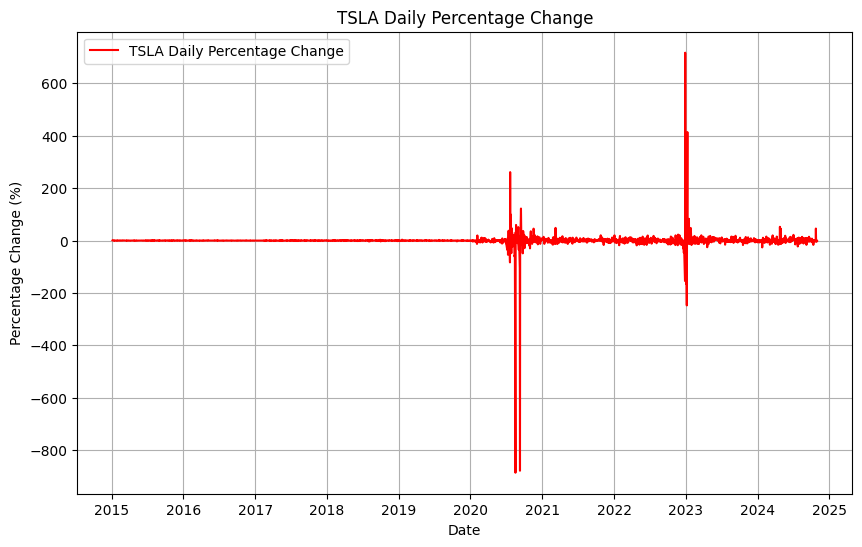

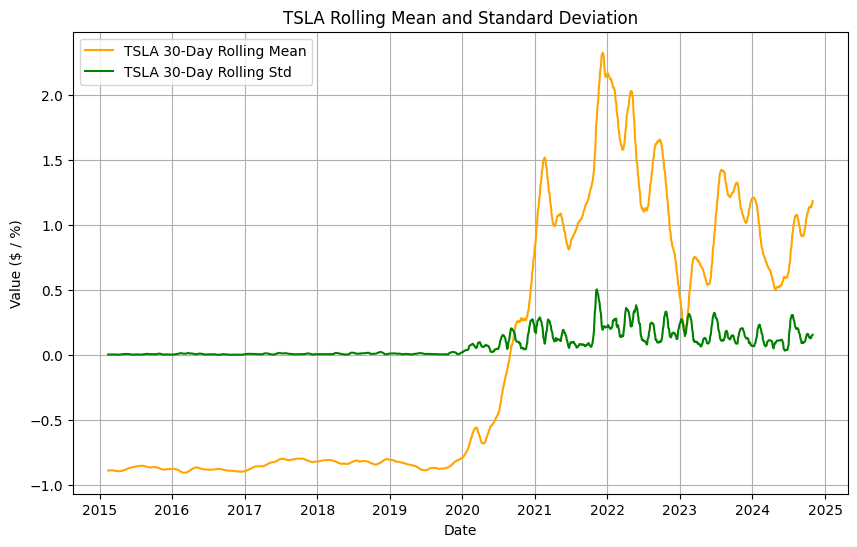

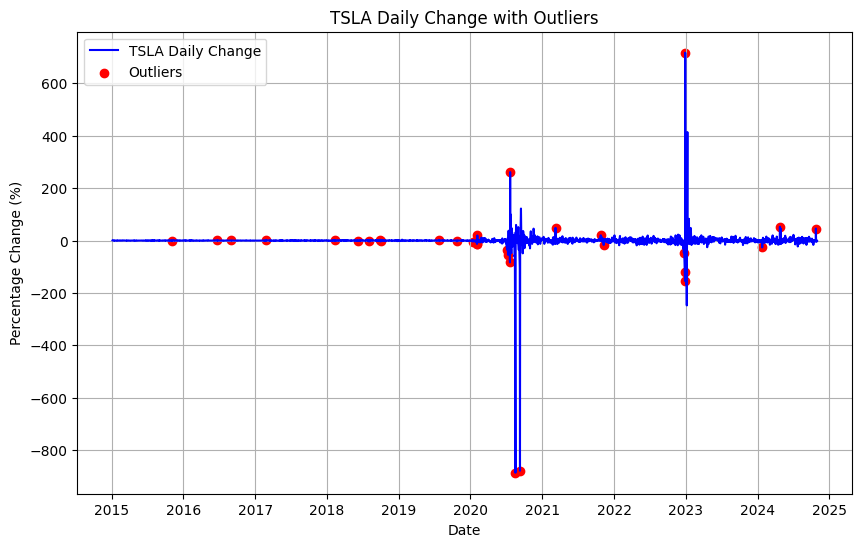


Outliers for TSLA:
            Daily Change
Date                    
2015-11-04     -1.590996
2016-06-22      1.580606
2016-09-01      0.770087
2017-02-23      1.253151
2018-02-08      2.244109


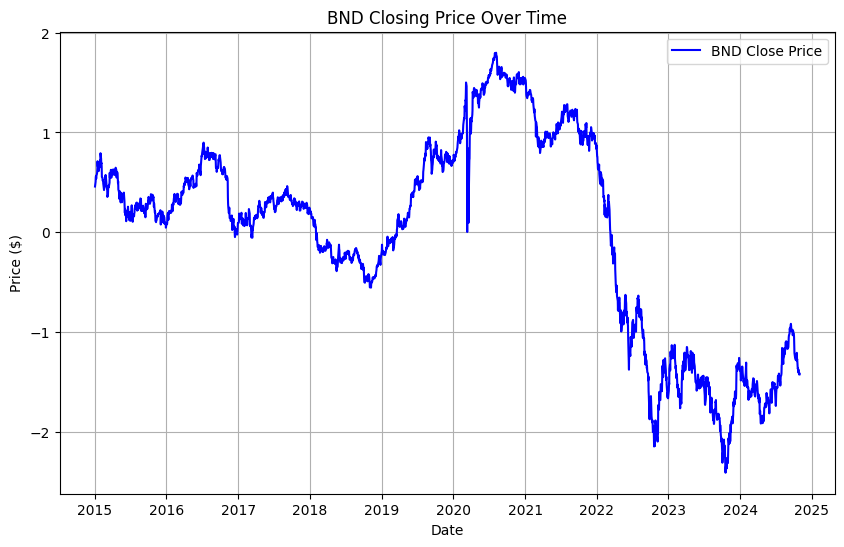

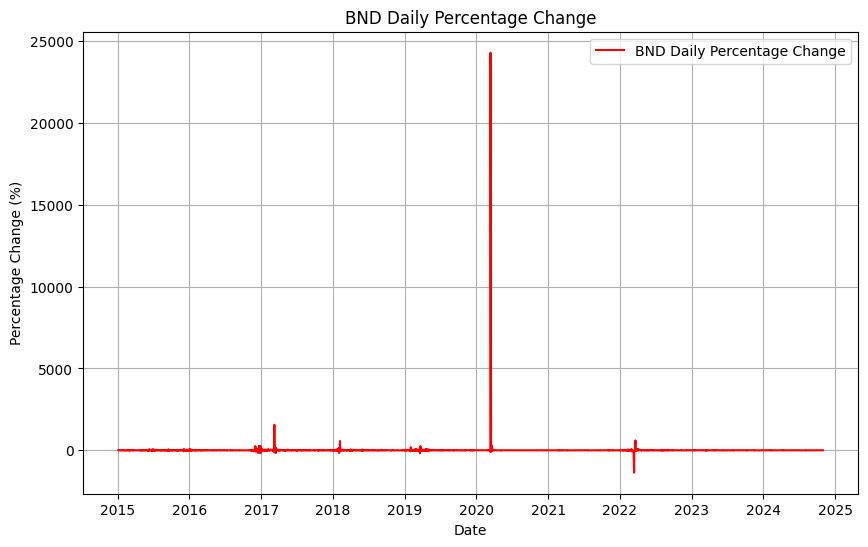

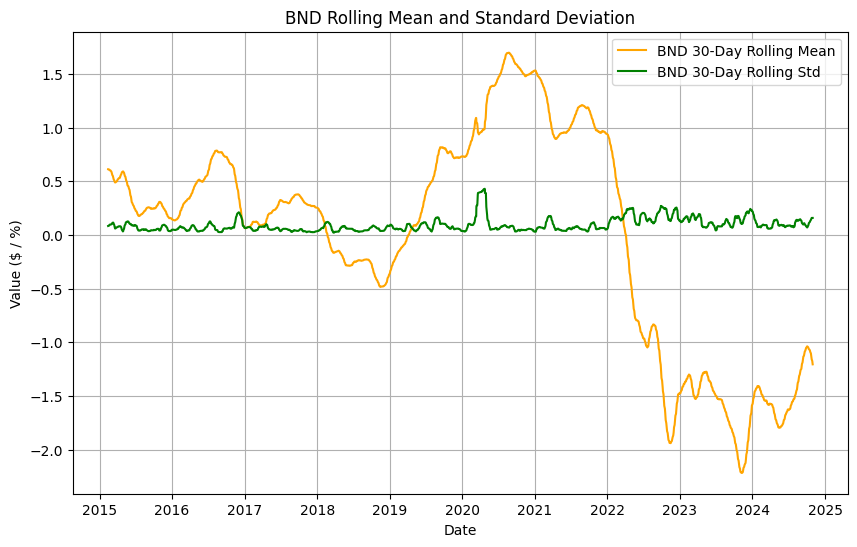

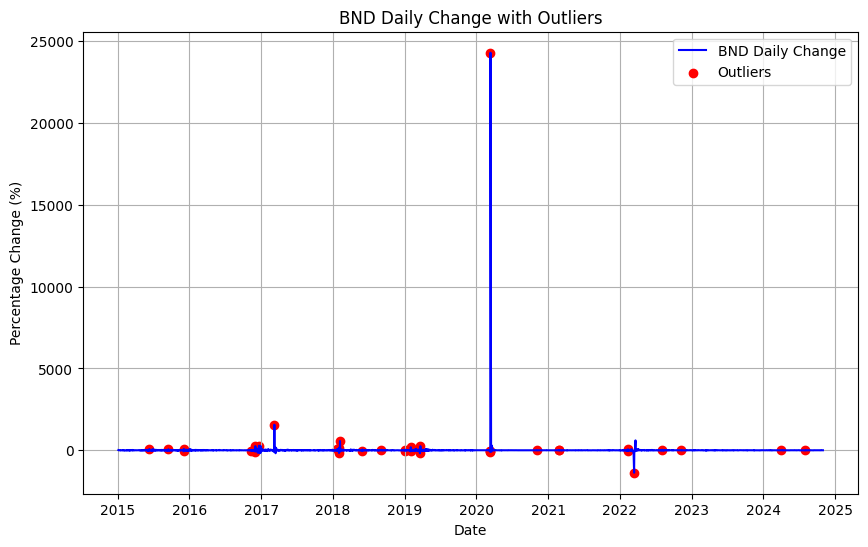


Outliers for BND:
            Daily Change
Date                    
2015-06-11     67.381717
2015-09-17     60.212219
2015-12-03    -61.525721
2015-12-04     81.226387
2016-11-09    -31.490495


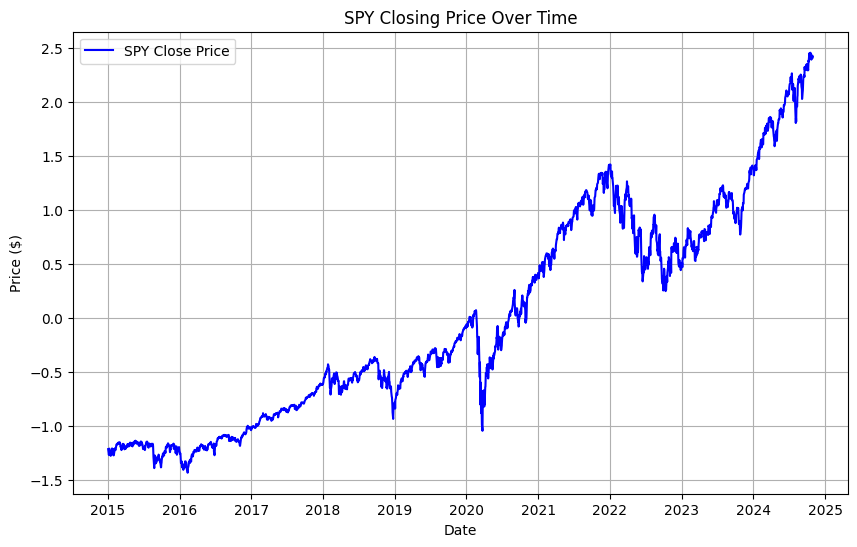

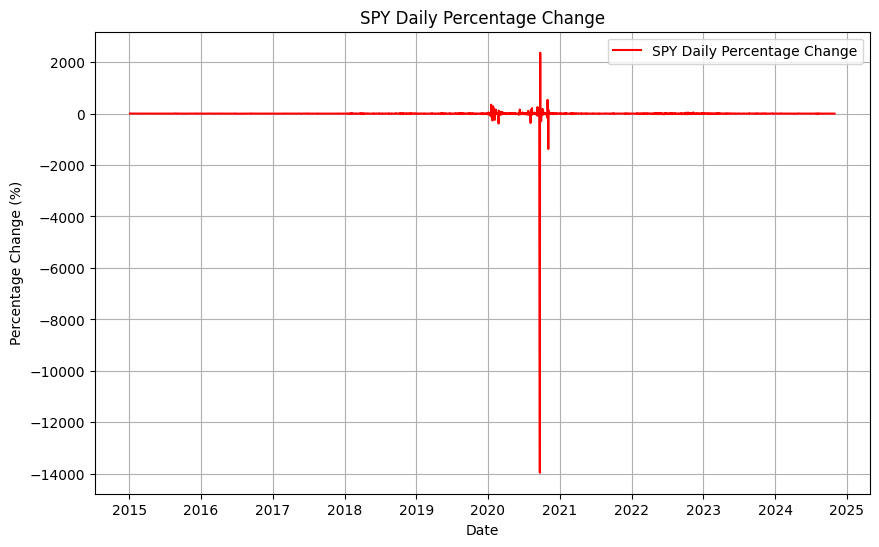

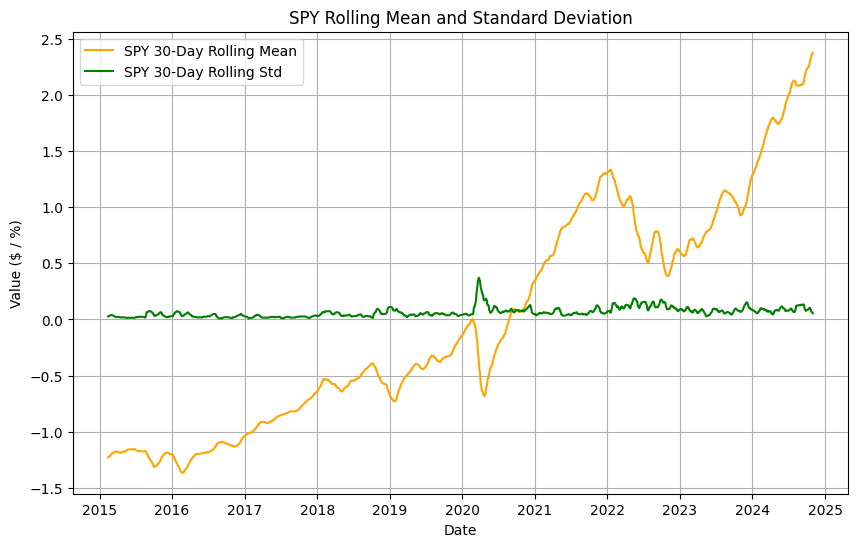

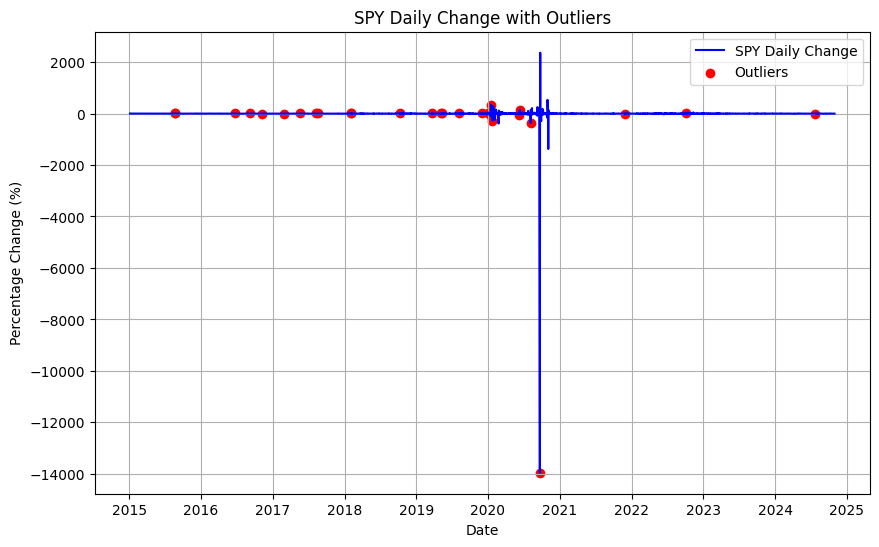


Outliers for SPY:
            Daily Change
Date                    
2015-08-21      4.847867
2015-08-24      6.272893
2016-06-24      6.318139
2016-09-09      4.664906
2016-11-07     -3.768210


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot the closing price over time
def plot_close_price(data, ticker):
    plt.figure(figsize=(10, 6))
    plt.plot(data["Close"], label=f"{ticker} Close Price", color='blue')
    plt.title(f"{ticker} Closing Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot daily percentage change
def plot_daily_change(data, ticker):
    data['Daily Change'] = data['Close'].pct_change() * 100  # percentage change
    plt.figure(figsize=(10, 6))
    plt.plot(data['Daily Change'], label=f"{ticker} Daily Percentage Change", color='red')
    plt.title(f"{ticker} Daily Percentage Change")
    plt.xlabel("Date")
    plt.ylabel("Percentage Change (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot rolling mean and rolling standard deviation
def plot_rolling_stats(data, ticker, window=30):
    data['Rolling Mean'] = data['Close'].rolling(window=window).mean()
    data['Rolling Std'] = data['Close'].rolling(window=window).std()
    
    plt.figure(figsize=(10, 6))
    plt.plot(data['Rolling Mean'], label=f"{ticker} {window}-Day Rolling Mean", color='orange')
    plt.plot(data['Rolling Std'], label=f"{ticker} {window}-Day Rolling Std", color='green')
    plt.title(f"{ticker} Rolling Mean and Standard Deviation")
    plt.xlabel("Date")
    plt.ylabel("Value ($ / %)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to detect outliers based on daily returns
def detect_outliers(data, ticker):
    # Calculate daily returns
    data['Daily Change'] = data['Close'].pct_change() * 100
    
    # Calculate rolling mean and std for outlier detection
    rolling_mean = data['Daily Change'].rolling(window=30).mean()
    rolling_std = data['Daily Change'].rolling(window=30).std()
    
    # Define outlier as daily change > mean + 3*std or < mean - 3*std
    upper_bound = rolling_mean + 3 * rolling_std
    lower_bound = rolling_mean - 3 * rolling_std
    outliers = data[(data['Daily Change'] > upper_bound) | (data['Daily Change'] < lower_bound)]
    
    # Visualize daily change and mark outliers
    plt.figure(figsize=(10, 6))
    plt.plot(data['Daily Change'], label=f"{ticker} Daily Change", color='blue')
    plt.scatter(outliers.index, outliers['Daily Change'], color='red', label='Outliers', marker='o')
    plt.title(f"{ticker} Daily Change with Outliers")
    plt.xlabel("Date")
    plt.ylabel("Percentage Change (%)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return outliers

# Main script to load data and perform EDA
if __name__ == "__main__":
    # Define the full paths for each ticker's processed CSV data file
    data_paths = {
        "TSLA": r"C:\Users\hayyu.ragea\AppData\Local\Programs\Python\Python312\portfolio-management-optimization\data\TSLA_processed.csv",
        "BND": r"C:\Users\hayyu.ragea\AppData\Local\Programs\Python\Python312\portfolio-management-optimization\data\BND_processed.csv",
        "SPY": r"C:\Users\hayyu.ragea\AppData\Local\Programs\Python\Python312\portfolio-management-optimization\data\SPY_processed.csv"
    }

    # Loop through each ticker and perform EDA
    for ticker, path in data_paths.items():
        # Load the processed data
        data = pd.read_csv(path, index_col="Date", parse_dates=True)
        
        # a. Visualize the closing price over time to identify trends and patterns
        plot_close_price(data, ticker)

        # b. Calculate and plot the daily percentage change to observe volatility
        plot_daily_change(data, ticker)

        # c. Analyze volatility by calculating rolling means and standard deviations
        plot_rolling_stats(data, ticker)

        # d. Perform outlier detection to identify significant anomalies
        outliers = detect_outliers(data, ticker)

        # i. Analyze days with unusually high or low returns (outliers)
        if not outliers.empty:
            print(f"\nOutliers for {ticker}:")
            print(outliers[['Daily Change']].head())  # Display first few outliers
        else:
            print(f"\nNo outliers detected for {ticker}.")
